In [1]:
%matplotlib inline

In [3]:
import pandas as pd

In [5]:
pd.read_csv('gd_predict_1118.txt', names = ['line','date','hour','y'],
           header = None)

,line,date,hour,y
0,线路10,20150101,6,681
1,线路15,20150101,6,253
2,线路10,20150101,7,2337
3,线路15,20150101,7,1214
4,线路10,20150101,8,3347
5,线路15,20150101,8,1902
6,线路10,20150101,9,2717
7,线路15,20150101,9,1489
8,线路10,20150101,10,2761
9,线路15,20150101,10,1425


In [8]:
s = [('2015010620', 749), ('2015010621', 747), 
     ('2015010706', 471), ('2015010707', 1744), 
     ('2015010708', 2177), ('2015010709', 1387), 
     ('2015010710', 1096), ('2015010711', 939)]
s.sort(key=lambda x:x[0])
print(s)

[('2015010620', 749), ('2015010621', 747), ('2015010706', 471), ('2015010707', 1744), ('2015010708', 2177), ('2015010709', 1387), ('2015010710', 1096), ('2015010711', 939)]


In [4]:
train = pd.read_csv('train_features_1119.csv')
predict = pd.read_csv('predict_features_1119.csv')
print(train.shape)
print(predict.shape)

(2208, 61)
(112, 58)


In [5]:
train.day_sunny and train.day_cloudy and train.day_yin and train.day_mai
'''(train.day_zhenyu and train.day_leizhenyu and train.day_xiaoyu and 
 train.day_xiaodaozhongyu and train.day_zhongyu and train.day_zhongdaodayu and 
 train.day_dayu and train.day_dadaobaoyu)'''

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation

X = train.as_matrix(columns=['is_workday','temp_day','temp_night',\
'is_monday','is_tuesday','is_wednesday','is_thursday',\
'is_friday','is_saturday','is_Sunday',\
'day_sunny','day_cloudy','day_yin','day_mai','day_zhenyu',\
'day_leizhenyu','day_xiaoyu','day_xiaodaozhongyu','day_zhongyu',\
    'day_zhongdaodayu','day_dayu','day_dadaobaoyu',\
    'night_sunny','night_cloudy','night_yin','night_mai','night_zhenyu',\
    'night_leizhenyu','night_xiaoyu','night_xiaodaozhongyu','night_zhongyu',\
    'night_zhongdaodayu','night_dayu','night_dadaobaoyu','6','7','8','9',\
    '10','11','12','13','14','15','16','17','18','19','20','21'])
y10 = train.as_matrix(columns=['line10']).ravel()
y15 = train.as_matrix(columns=['line15']).ravel()

X_train = X
X_test = X

y10_train = y10
y10_test = y10

y15_train = y15
y15_test = y15


clf10 = RandomForestRegressor(n_estimators=500)
clf10 = clf10.fit(X_train, y10_train)

clf15 = RandomForestRegressor(n_estimators=500)
clf15 = clf15.fit(X_train, y15_train)

print(clf10.score(X_train, y10_train))
print(clf10.score(X_test, y10_test))
print(clf15.score(X_train, y15_train))
print(clf15.score(X_test, y15_test))

0.992072951809
0.992072951809
0.990886695559
0.990886695559


In [7]:
def precision(y_pred, y_real):
    """ cal precision:
    
    input two list
    output precision and plot(to do)
    """
    import math
    import statistics
    import matplotlib.pyplot as plt
    
    deviation = []
    
    for i in range(0, len(y_pred)):
        deviation.append(math.fabs(y_pred[i] - y_real[i]) / y_real[i])
    
    #print(deviation)
    
    for i in range(0, len(deviation)):
        if deviation[i] > 0.3:
            deviation[i] = 0
        else:
            deviation[i] = 1 - 1 / 0.3 * deviation[i]
    #print(deviation)
    print(statistics.mean(deviation))
    plt.scatter(y_pred, y_real)
    plt.show()

0.909339289205


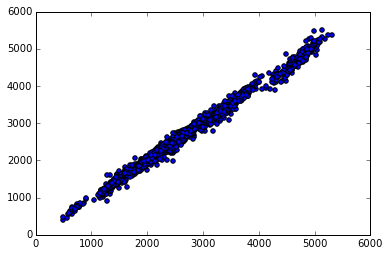

0.893781437905


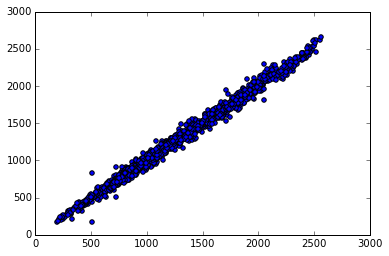

In [8]:
y10_pred_rf = clf10.predict(X_test)
y15_pred_rf = clf15.predict(X_test)

precision(y10_pred_rf,y10_test)
precision(y15_pred_rf,y15_test)

ValueError: x and y must have same first dimension

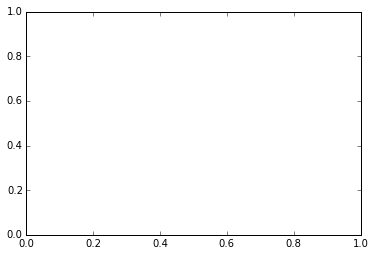

In [9]:
import matplotlib.pyplot as plt
x = [i for i in range(0,16*7)]
plt.plot(x,y10_test,color='b')
plt.plot(x,y15_test,color='b')
plt.plot(x,y10_pred_rf,color='r')
plt.plot(x,y15_pred_rf,color='r')

[0.6666666666666666, 0.5, 0.4, 0.3333333333333333]
[0.3333333333333333, 0.4, 0.5, 0.6666666666666666]
[3, 2, 1, 0]
0.0


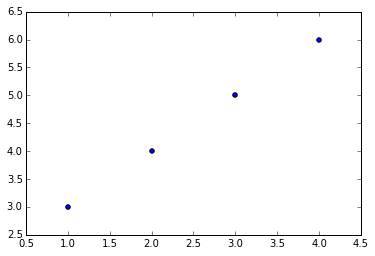

In [26]:
def precision_max_dev(y_pred, y_real):
    """ cal precision:
    
    input two list
    output precision and plot(to do)
    """
    import math
    import statistics
    import matplotlib.pyplot as plt
    
    deviation = []
    
    for i in range(0, len(y_pred)):
        deviation.append(math.fabs(y_pred[i] - y_real[i]) / y_real[i])
    print(deviation)
    top_dev = sorted(deviation)
    
    index_top_dev = [deviation.index(i) for i in top_dev]
    
    print(top_dev)
    print(index_top_dev)
    
    for i in range(0, len(deviation)):
        if deviation[i] > 0.3:
            deviation[i] = 0
        else:
            deviation[i] = 1 - 1 / 0.3 * deviation[i]
    #print(deviation)
    print(statistics.mean(deviation))
    plt.scatter(y_pred, y_real)
    plt.show()
    
precision_max_dev([1,2,3,4],[3,4,5,6])

In [10]:
X_predict = predict.as_matrix(columns=['is_workday','temp_day','temp_night',\
'is_monday','is_tuesday','is_wednesday','is_thursday',\
'is_friday','is_saturday','is_Sunday',\
'day_sunny','day_cloudy','day_yin','day_mai','day_zhenyu',\
'day_leizhenyu','day_xiaoyu','day_xiaodaozhongyu','day_zhongyu',\
    'day_zhongdaodayu','day_dayu','day_dadaobaoyu',\
    'night_sunny','night_cloudy','night_yin','night_mai','night_zhenyu',\
    'night_leizhenyu','night_xiaoyu','night_xiaodaozhongyu','night_zhongyu',\
    'night_zhongdaodayu','night_dayu','night_dadaobaoyu','6','7','8','9',\
    '10','11','12','13','14','15','16','17','18','19','20','21'])
print(X_predict.shape)
y10_predict = clf10.predict(X_predict)
#print(y10_predict)
y15_predict = clf15.predict(X_predict)
#print(y15_predict)

(112, 50)


In [11]:
s10 = pd.Series(y10_predict, name='y10').astype(int)
s15 = pd.Series(y15_predict, name='y15').astype(int)
predicted = pd.concat([predict, s10, s15], axis=1)
predicted[['date','hour','y10','y15']].to_csv('predict_rf_1122.csv')

In [5]:
train

,top col,time,hour,weekday_x,is_workday,line10,line15,date,weather_day,weather_night,...,12,13,14,15,16,17,18,19,20,21
0,0,2014-08-01 06:00:00,6,4,1,1118,521,8/1/14,晴,雷阵雨,...,0,0,0,0,0,0,0,0,0,0
1,1,2014-08-01 07:00:00,7,4,1,4448,1945,8/1/14,晴,雷阵雨,...,0,0,0,0,0,0,0,0,0,0
2,2,2014-08-01 08:00:00,8,4,1,4964,2617,8/1/14,晴,雷阵雨,...,0,0,0,0,0,0,0,0,0,0
3,3,2014-08-01 09:00:00,9,4,1,3158,1597,8/1/14,晴,雷阵雨,...,0,0,0,0,0,0,0,0,0,0
4,4,2014-08-01 10:00:00,10,4,1,2691,1032,8/1/14,晴,雷阵雨,...,0,0,0,0,0,0,0,0,0,0
5,5,2014-08-01 11:00:00,11,4,1,1965,832,8/1/14,晴,雷阵雨,...,0,0,0,0,0,0,0,0,0,0
6,6,2014-08-01 12:00:00,12,4,1,1963,751,8/1/14,晴,雷阵雨,...,1,0,0,0,0,0,0,0,0,0
7,7,2014-08-01 13:00:00,13,4,1,1934,739,8/1/14,晴,雷阵雨,...,0,1,0,0,0,0,0,0,0,0
8,8,2014-08-01 14:00:00,14,4,1,1946,799,8/1/14,晴,雷阵雨,...,0,0,1,0,0,0,0,0,0,0
9,9,2014-08-01 15:00:00,15,4,1,2209,806,8/1/14,晴,雷阵雨,...,0,0,0,1,0,0,0,0,0,0
